In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import pandas as pd
import io
import requests
import seaborn as sns
%matplotlib inline
import statistics
import numpy as np
import datetime
import csv

df = pd.read_csv('DataSample_AIC.csv')
#df.head()

In [2]:
df.dtypes.value_counts()

object     6
int64      1
float64    1
dtype: int64

Переведем данные столбца 'UnitPrice' из object в float64, а затем добавим столец, в котором расчитывается Выручка ('SAles') = Quantity*UnitPrice

In [3]:
df['UnitPrice'] = df['UnitPrice'].str.replace(',', '.').astype(np.float)

In [4]:
df['Sales']=df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,2.75,17850.0,United Kingdom,22.00


Проанализируем данные таблицы, сгруппируем данные по CustomerID и посмотрим на статистику данных еще раз

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 9 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null object
UnitPrice      54214 non-null float64
CustomerID     40643 non-null float64
Country        54214 non-null object
Sales          54214 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.7+ MB


In [6]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
count,54214,54214,54080,54214.000000,54214,54214.000000,40643.000000,54214,54214.000000
unique,14877,3351,3401,NaN,14058,NaN,NaN,37,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom,NaN
freq,127,237,243,NaN,127,NaN,NaN,49602,NaN
mean,NaN,NaN,NaN,9.610802,NaN,4.307341,15283.422803,NaN,18.447189
std,NaN,NaN,NaN,57.358422,NaN,47.834496,1707.982278,NaN,83.326884
min,NaN,NaN,NaN,-9600.000000,NaN,0.000000,12347.000000,NaN,-6930.000000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13969.000000,NaN,3.480000
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN,9.840000
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16775.000000,NaN,17.400000


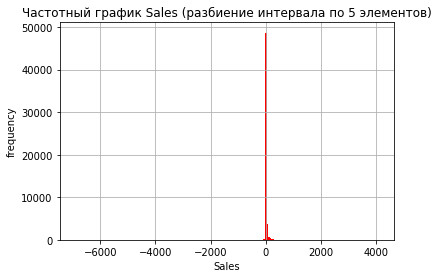

In [8]:
n, bins, patches = plt.hist(df['Sales'], 200, facecolor='r')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.title('Частотный график Sales (разбиение интервала по 5 элементов)')
plt.grid(True)
plt.show()

In [9]:
df_grouped_customer = df.groupby('CustomerID').sum().reset_index()
#df_grouped_customer.head()
df_grouped_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3819 entries, 0 to 3818
Data columns (total 4 columns):
CustomerID    3819 non-null float64
Quantity      3819 non-null int64
UnitPrice     3819 non-null float64
Sales         3819 non-null float64
dtypes: float64(3), int64(1)
memory usage: 119.4 KB


In [10]:
df_grouped_customer.describe(include='all')

,CustomerID,Quantity,UnitPrice,Sales
count,3819.000000,3819.000000,3819.000000,3819.000000
mean,15291.032993,129.826132,36.978874,220.006863
std,1712.316686,536.723726,174.224312,923.899704
min,12347.000000,-600.000000,0.040000,-2863.240000
25%,13822.500000,16.000000,5.850000,30.865000
50%,15289.000000,42.000000,15.140000,75.150000
75%,16760.500000,112.500000,34.460000,188.990000
max,18287.000000,20332.000000,7000.360000,26533.440000


In [11]:
#df_grouped_customer['CustomerID'].unique()

In [12]:
df_grouped_customer= df_grouped_customer.query("CustomerID not in [0,""]")
df_grouped_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 0 to 3818
Data columns (total 4 columns):
CustomerID    3819 non-null float64
Quantity      3819 non-null int64
UnitPrice     3819 non-null float64
Sales         3819 non-null float64
dtypes: float64(3), int64(1)
memory usage: 149.2 KB


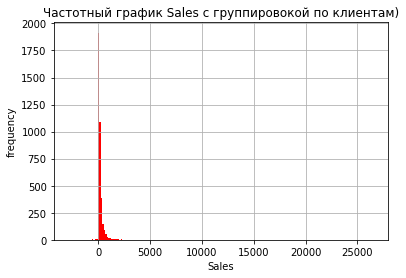

In [13]:
n, bins, patches = plt.hist(df_grouped_customer['Sales'], 200, facecolor='r')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.title('Частотный график Sales с группировокой по клиентам)')
plt.grid(True)
plt.show()

In [23]:
df_grouped_InvoiceNo = df.groupby('InvoiceNo').sum().sort_values(by='Sales', ascending=False).reset_index()
df_grouped_InvoiceNo.head(10)

,InvoiceNo,Quantity,UnitPrice,CustomerID,Sales
0,574941,1839,88.20,0.0,7657.35
1,576365,1950,50.20,0.0,6808.90
2,558526,2232,7.75,53847.0,5682.00
3,548203,1089,340.22,0.0,4350.37
4,540689,1284,3.21,17450.0,4121.64
5,541220,956,34.90,113248.0,4054.20
6,581457,1022,7.54,36204.0,3995.06
7,581115,1404,2.75,15195.0,3861.00
8,561633,768,9.60,35898.0,3686.40
9,563614,1948,23.30,161395.0,3136.44


In [31]:
#df_grouped_InvoiceN = df.groupby('InvoiceNo','CustomerID').sum().sort_values(by='Sales', ascending=False).reset_index()
#df_grouped_InvoiceNo.head(10)
df_grouped_InvoiceN=df.groupby(['InvoiceNo','CustomerID'])['Sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).reset_index()
df_grouped_InvoiceN.head(1)

,InvoiceNo,CustomerID,sum,count
0,558526,17949.0,5682.00,3
1,540689,17450.0,4121.64,1
2,541220,14156.0,4054.20,8
3,581457,18102.0,3995.06,2
4,581115,15195.0,3861.00,1
5,561633,17949.0,3686.40,2
6,563614,12415.0,3136.44,13
7,562439,12931.0,3104.24,4
8,546789,15769.0,2970.00,3
9,556917,12415.0,2933.88,20


In [35]:
#df_grouped_InvoiceNo['InvoiceNo'].replace('', np.nan, inplace=True)
#df_grouped_InvoiceNo.dropna(subset=['InvoiceNo'], inplace=True)
#df_grouped_InvoiceNo.describe(include='all')

In [34]:
df_grouped_InvoiceN.describe()

,CustomerID,sum,count
count,13673.000000,13673.000000,13673.000000
mean,15246.901046,61.450026,2.972501
std,1716.336665,185.593162,2.921161
min,12347.000000,-6930.000000,1.000000
25%,13798.000000,15.300000,1.000000
50%,15134.000000,32.590000,2.000000
75%,16745.000000,63.300000,4.000000
max,18287.000000,5682.000000,74.000000


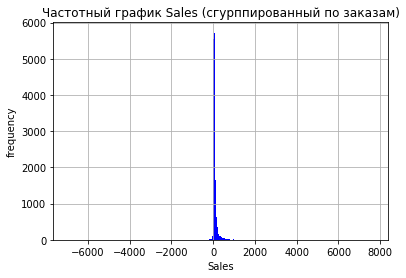

In [18]:
n, bins, patches = plt.hist(df_grouped_InvoiceNo['Sales'], 300, facecolor='b')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.title('Частотный график Sales (сгурппированный по заказам)')
plt.grid(True)
plt.show()

In [38]:
df_grouped_Customer=df.groupby(['CustomerID'])['Sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).reset_index()
df_grouped_Customer.head(10)

,CustomerID,sum,count
0,18102.0,26533.44,43
1,14646.0,25312.76,195
2,17450.0,18233.46,42
3,12415.0,16030.81,86
4,14911.0,14674.63,563
5,17949.0,12048.08,8
6,14156.0,11775.91,143
7,17511.0,8961.03,115
8,14096.0,7974.99,546
9,15769.0,7914.24,17


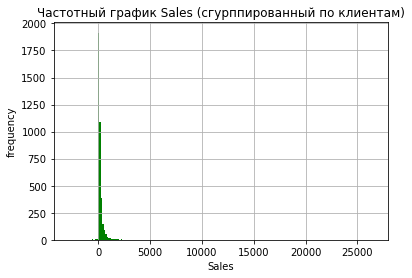

In [40]:
n, bins, patches = plt.hist(df_grouped_Customer['sum'], 200, facecolor='g')
plt.xlabel('Sales')
plt.ylabel('frequency')
plt.title('Частотный график Sales (сгурппированный по клиентам)')
plt.grid(True)
plt.show()

In [50]:
df_grouped_Country=df.groupby(['Country'])['Sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).reset_index()
df_grouped_Country.head(10)

,Country,sum,count
0,United Kingdom,844816.921,49602
1,EIRE,27443.140,787
2,Netherlands,26267.780,234
3,Germany,22519.200,951
4,France,19472.990,881
5,Australia,17072.960,130
6,Switzerland,6209.300,189
7,Spain,5955.580,253
8,Belgium,4032.060,211
9,Norway,3859.900,105


In [56]:
print(sum(df['Sales']))

1000095.8910000061


In [55]:
df_grouped_Country_1=df.groupby(['Country'])['Sales'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index()
df_grouped_Country_1.head(10)
df_grouped_Country_1['Country']=df_grouped_Country_1['Country'].astype(np.object)
#df_grouped_Country.plot(kind='pie', subplots=True, figsize=(8, 8), dpi= 80)
df_grouped_Country_1.plot(kind='pie',subplots=True).astype(np.float)
plt.title("Pie Chart of Country - producer")
plt.ylabel("")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'str'